In [10]:
import pandas as pd
import seaborn as sns
import datetime
import requests
import time

%matplotlib inline

In [11]:
def get_markets_ndarray():
    resp = requests.get('https://api.pro.coinbase.com/products')
    if resp.status_code != 200:
        return None
    else:
        df = pd.DataFrame(resp.json())
        return df[['id']].values

In [12]:
def get_market_data(market, granularity):
    resp = requests.get('https://api.pro.coinbase.com/products/' + market + '/candles?granularity=' + str(granularity))
    if resp.status_code != 200:
        raise Exception(format(resp.json()['message']))
    else:
        df = pd.DataFrame(resp.json(), columns=[ 'epoch', 'low', 'high', 'open', 'close', 'volume' ])
        df = df.iloc[::-1].reset_index()
        return df

In [13]:
def preprocess_market(market, granularity):
    df = get_market_data(market, granularity)
    df['ma1'] = df.close.rolling(5, min_periods=1).mean()
    df['ma2'] = df.close.rolling(10, min_periods=1).mean()
    df['up'] = df['ma1'] > df['ma2']
    df['up'] = df['up'].astype(int)
    df = df[['up']]
    df = df.rename(columns={'up': market})
    return df.T

In [14]:
df = pd.DataFrame()
for market in get_markets_ndarray():
    print ('Processing', market[0])
    
    tmp_df = df.append(preprocess_market(market[0], 3600))
    
    if len(tmp_df.T) == 300:
        df = df.append(preprocess_market(market[0], 3600))
        time.sleep(0.1) # avoid public rate exceeded

Processing FORTH-EUR
Processing 1INCH-USD
Processing NMR-BTC
Processing ANKR-GBP
Processing ALGO-GBP
Processing OMG-EUR
Processing ZRX-EUR
Processing WBTC-USD
Processing CRV-GBP
Processing BAL-BTC
Processing MATIC-EUR
Processing OMG-BTC
Processing SNX-USD
Processing ETH-USDC
Processing SNX-BTC
Processing LINK-USD
Processing GRT-USD
Processing BCH-GBP
Processing 1INCH-BTC
Processing ADA-ETH
Processing LINK-GBP
Processing ALGO-EUR
Processing ADA-USD
Processing OMG-GBP
Processing ZEC-USD
Processing NU-EUR
Processing CGLD-USD
Processing LINK-ETH
Processing WBTC-BTC
Processing XTZ-EUR
Processing GNT-USDC
Processing ZRX-BTC
Processing ETH-BTC
Processing BTC-GBP
Processing BAT-USDC
Processing OXT-USD
Processing STORJ-BTC
Processing ETC-USD
Processing XTZ-USD
Processing BAT-ETH
Processing FIL-GBP
Processing DASH-USD
Processing AAVE-GBP
Processing ETH-GBP
Processing CVC-USDC
Processing BAND-EUR
Processing LTC-BTC
Processing AAVE-USD
Processing DAI-USDC
Processing SNX-EUR
Processing FORTH-GBP
Pr

In [15]:
df.dropna(inplace=True)
df = df.astype(int)

In [16]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
ALGO-BTC,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
ANKR-EUR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0
BNT-BTC,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1
ADA-EUR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0
UMA-EUR,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BNT-EUR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
SUSHI-ETH,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1
NMR-EUR,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0
XLM-USD,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1,1,1,1,1


In [8]:
df.to_csv('CoinbaseProMarketAnalysis.csv')

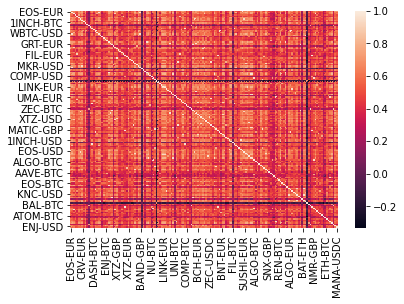

In [9]:
sns.heatmap(df.T.corr())